# Adding new features to improve Model
- Thêm các biến Phân loại 

In [1]:
import math 
import pandas as pd
import numpy as np
from collections import Counter

import scipy.stats as ss
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
from matplotlib import pyplot as plt

import sys
import os.path as path
lib_path =  path.abspath(path.join('' ,"../../api/common"))
sys.path.insert(1, lib_path)
from transform_split_data import transform_split_data
from predict import predict, evaluate

%matplotlib inline
%load_ext autotime
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

time: 110 ms


## 1. Load data
- Dữ liệu từ pre_process_data.csv

In [2]:
# Load dữ liệu
df = pd.read_csv('..\\pre_process_data\\pre_process_data.csv', encoding='utf-8')
data_df = df.copy()
data_df

,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,race_id,Year,Month,RaceInfo$TokuNum,...,KS_SikakuCD,KS_MinaraiCD,KS_TozaiCD,KS_Syotai,KS_ChokyosiCode,CH_SexCD,CH_TozaiCD,CH_Syotai,top3,speed
0,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.446809
1,2008,105,6,1,1,1,1,2008,1,0,...,1.0,0.0,1.0,,0.0,1,1,,1,58.496953
2,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.221024
3,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.676903
4,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.457375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494336,2018,520,8,3,10,12,35925,2018,5,0,...,2.0,0.0,2.0,,0.0,1,2,,1,58.378378
494337,2018,520,8,3,10,12,35925,2018,5,0,...,2.0,0.0,2.0,,0.0,1,2,,0,57.857143
494338,2018,520,8,3,10,12,35925,2018,5,0,...,1.0,3.0,2.0,,1009.0,1,2,,0,57.754011
494339,2018,520,8,3,10,12,35925,2018,5,0,...,1.0,0.0,2.0,,411.0,1,2,,0,57.497782


time: 5.33 s


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494341 entries, 0 to 494340
Data columns (total 78 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id$Year                      494341 non-null  int64  
 1   id$MonthDay                  494341 non-null  int64  
 2   id$JyoCD                     494341 non-null  int64  
 3   id$Kaiji                     494341 non-null  int64  
 4   id$Nichiji                   494341 non-null  int64  
 5   id$RaceNum                   494341 non-null  int64  
 6   race_id                      494341 non-null  int64  
 7   Year                         494341 non-null  int64  
 8   Month                        494341 non-null  int64  
 9   RaceInfo$TokuNum             494341 non-null  int64  
 10  RaceInfo$Nkai                494341 non-null  int64  
 11  GradeCD                      494341 non-null  object 
 12  JyokenInfo$SyubetuCD         494341 non-null  int64  
 13 

## 2. Tạo thêm biến mới 

- Chuyển đổi biến phân loại có số chiều cao bằng kỹ thuật target encoding
    - converted_ChokyosiCode
    - converted_BanusiCode
    - converted_UM_BreederCode

In [4]:
data_df['ChokyosiCode'] = data_df['ChokyosiCode'].astype('category')
data_df['UM_BreederCode'] = data_df['UM_BreederCode'].astype(int)
data_df['UM_BreederCode'] = data_df['UM_BreederCode'].astype('category')
data_df['BanusiCode'] = data_df['BanusiCode'].astype('category')

time: 328 ms


In [5]:
data_df[['ChokyosiCode', 'BanusiCode', 'UM_BreederCode']].describe(include='category')

,ChokyosiCode,BanusiCode,UM_BreederCode
count,494341,494341,494341
unique,519,2784,3003
top,1075,415800,393126
freq,4431,9846,36005


time: 172 ms


- Tạo nhóm tốp 1

In [6]:
condition = data_df['KakuteiJyuni']==1
data_df['top1'] = 0
data_df.loc[condition, 'top1'] = 1
data_df[['KakuteiJyuni', 'top1']]

,KakuteiJyuni,top1
0,8,0
1,1,1
2,3,0
3,6,0
4,2,0
...,...,...
494336,1,1
494337,5,0
494338,6,0
494339,8,0


time: 281 ms


- Tạo nhóm tốp 2

In [7]:
condition = (data_df['KakuteiJyuni']==1) | (data_df['KakuteiJyuni']==2)
data_df['top2'] = 0
data_df.loc[condition, 'top2'] = 1
data_df[['KakuteiJyuni', 'top2']]

,KakuteiJyuni,top2
0,8,0
1,1,1
2,3,0
3,6,0
4,2,1
...,...,...
494336,1,1
494337,5,0
494338,6,0
494339,8,0


time: 250 ms


- Tạo nhóm tốp 5

In [8]:
condition = (data_df['KakuteiJyuni']>=5) & (data_df['KakuteiJyuni']<=8)
data_df['top5'] = 0
data_df.loc[condition, 'top5'] = 1
data_df[['KakuteiJyuni', 'top5']]

,KakuteiJyuni,top5
0,8,1
1,1,0
2,3,0
3,6,1
4,2,0
...,...,...
494336,1,0
494337,5,1
494338,6,1
494339,8,1


time: 281 ms


In [9]:
def target_encoding(data_df, column='ChokyosiCode', target='top2', m='all'):
    
    df_train = data_df[data_df['id$Year']<2018]
    if m == 'all':
        m = len(df_train)
    # Compute the target mean
    target_mean = df_train[target].mean()

    # Compute the number of values and the mean of each group
    agg = df_train.groupby(column)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth_probability = (counts * means + m * target_mean) / (counts + m)
    
    # Convert
    new_column_name = target + '_'  + column
    df = data_df.copy()
    df[new_column_name] = df[column]
    df[new_column_name] = df[new_column_name].map(smooth_probability)
    # Điền các giá bị khuyết của năm 2018 bằng giá trị trung bình
    df[new_column_name] = df[new_column_name].replace(np.nan, target_mean)
    
    return df

time: 141 ms


In [10]:
columns = ['ChokyosiCode', 'BanusiCode', 'UM_BreederCode']
new_data_df = data_df.copy()
for col in columns:
    new_data_df = target_encoding(new_data_df, column=col, target='top2', m=50)
    #new_data_df = target_encoding(new_data_df, column=col, target='top5', m=50)
new_data_df

,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,race_id,Year,Month,RaceInfo$TokuNum,...,CH_TozaiCD,CH_Syotai,top3,speed,top1,top2,top5,top2_ChokyosiCode,top2_BanusiCode,top2_UM_BreederCode
0,2008,105,6,1,1,1,1,2008,1,0,...,1,,0,57.446809,0,0,1,0.060358,0.070711,0.109784
1,2008,105,6,1,1,1,1,2008,1,0,...,1,,1,58.496953,1,1,0,0.136670,0.120593,0.127285
2,2008,105,6,1,1,1,1,2008,1,0,...,1,,1,58.221024,0,0,0,0.167392,0.201167,0.199936
3,2008,105,6,1,1,1,1,2008,1,0,...,1,,0,57.676903,0,0,1,0.125452,0.165676,0.195626
4,2008,105,6,1,1,1,1,2008,1,0,...,1,,1,58.457375,0,1,0,0.138794,0.116851,0.130605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494336,2018,520,8,3,10,12,35925,2018,5,0,...,2,,1,58.378378,1,1,0,0.152350,0.222047,0.193005
494337,2018,520,8,3,10,12,35925,2018,5,0,...,2,,0,57.857143,0,0,1,0.230975,0.231339,0.193005
494338,2018,520,8,3,10,12,35925,2018,5,0,...,2,,0,57.754011,0,0,1,0.111243,0.180945,0.086515
494339,2018,520,8,3,10,12,35925,2018,5,0,...,2,,0,57.497782,0,0,1,0.230975,0.184097,0.158608


time: 1.61 s


In [11]:
new_data_df[['top2', 'ChokyosiCode', 'top2_ChokyosiCode']]

,top2,ChokyosiCode,top2_ChokyosiCode
0,0,437,0.060358
1,1,138,0.136670
2,0,1054,0.167392
3,0,1081,0.125452
4,1,1088,0.138794
...,...,...,...
494336,1,1157,0.152350
494337,0,438,0.230975
494338,0,365,0.111243
494339,0,438,0.230975


time: 218 ms


- Kiểm tra kết quả

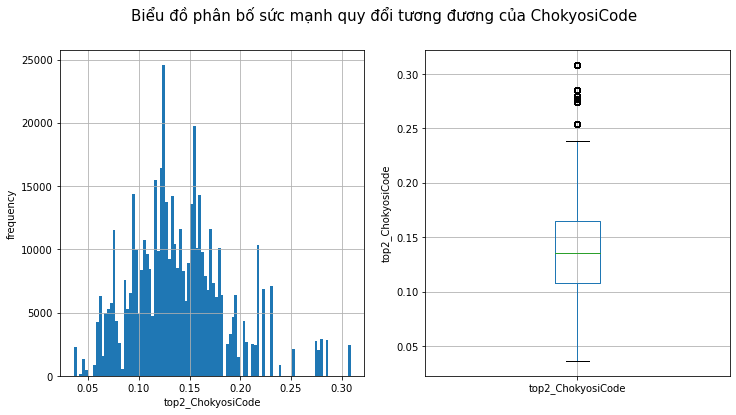

time: 735 ms


In [12]:
fig = plt.figure(figsize=(12, 6))
fig.add_subplot(1, 2, 1)
ax1 = new_data_df['top2_ChokyosiCode'].hist(bins=100);
ax1.set(xlabel="top2_ChokyosiCode", ylabel="frequency")
fig.add_subplot(1, 2, 2)
ax2 = new_data_df.boxplot(column=['top2_ChokyosiCode']);
ax2.set(xlabel=" ", ylabel="top2_ChokyosiCode")
plt.suptitle('Biểu đồ phân bố sức mạnh quy đổi tương đương của ChokyosiCode', size=15); 

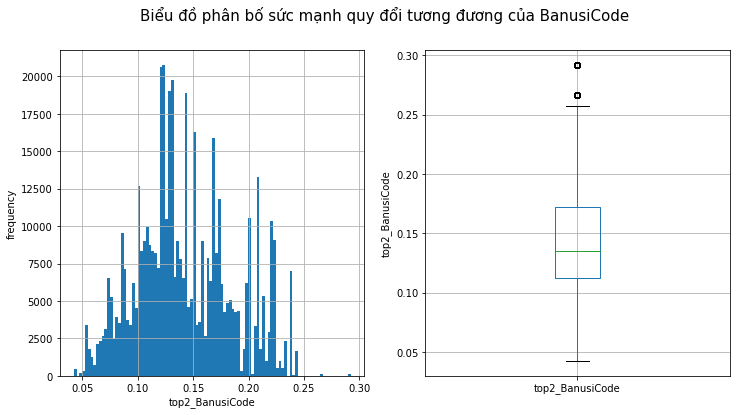

time: 656 ms


In [13]:
fig = plt.figure(figsize=(12, 6))
fig.add_subplot(1, 2, 1)
ax1 = new_data_df['top2_BanusiCode'].hist(bins=100);
ax1.set(xlabel="top2_BanusiCode", ylabel="frequency")
fig.add_subplot(1, 2, 2)
ax2 = new_data_df.boxplot(column=['top2_BanusiCode']);
ax2.set(xlabel=" ", ylabel="top2_BanusiCode")
plt.suptitle('Biểu đồ phân bố sức mạnh quy đổi tương đương của BanusiCode', size=15); 

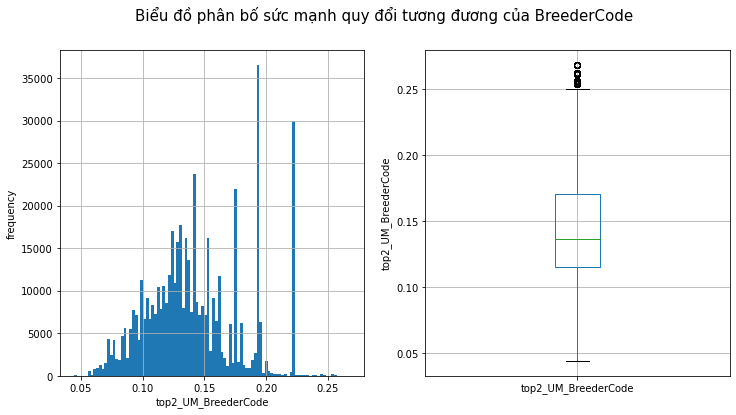

time: 578 ms


In [14]:
fig = plt.figure(figsize=(12, 6))
fig.add_subplot(1, 2, 1)
ax1 = new_data_df['top2_UM_BreederCode'].hist(bins=100);
ax1.set(xlabel="top2_UM_BreederCode", ylabel="frequency")
fig.add_subplot(1, 2, 2)
ax2 = new_data_df.boxplot(column=['top2_UM_BreederCode']);
ax2.set(xlabel=" ", ylabel="top2_UM_BreederCode")
plt.suptitle('Biểu đồ phân bố sức mạnh quy đổi tương đương của BreederCode', size=15); 

In [15]:
new_data_df[['top2_ChokyosiCode', 'top2_BanusiCode', 'top2_UM_BreederCode', 'speed']].corr()

,top2_ChokyosiCode,top2_BanusiCode,top2_UM_BreederCode,speed
top2_ChokyosiCode,1.000000,0.509094,0.431974,0.091328
top2_BanusiCode,0.509094,1.000000,0.568344,0.090073
top2_UM_BreederCode,0.431974,0.568344,1.000000,0.082030
speed,0.091328,0.090073,0.082030,1.000000


time: 172 ms


- <span style="color:blue">Nhận xét:
    - Độ tương quan của các nhân tố này khá cao với nhau
   

## 3. Tạo dữ liệu mới 

- Load danh sách features đã được chọn tự động

In [16]:
import json
with open('..\\feature_selection\\feature_dict.json') as js:
    feature_dict = json.load(js)
feature_dict

{'selected_feature': ['Kyori',
  'TenkoBaba$DirtBabaCD',
  'TenkoBaba$SibaBabaCD',
  'id$RaceNum',
  'TrackCD',
  'JyokenInfo$SyubetuCD',
  'GradeCD',
  'Honsyokin',
  'KS_SikakuCD',
  'Futan',
  'JyokenInfo$KigoCD',
  'JyokenInfo$JyuryoCD',
  'SexCD',
  'id$JyoCD',
  'BaTaijyu',
  'Month',
  'KS_ChokyosiCode',
  'Umaban',
  'TozaiCD',
  'Barei',
  'HN_HansyokuMochiKubun',
  'MinaraiCD',
  'KS_TozaiCD',
  'UmaKigoCD',
  'TenkoBaba$TenkoCD',
  'id$Kaiji',
  'id$Nichiji',
  'ZogenSa',
  'CH_Syotai',
  'KeiroCD',
  'KS_Syotai',
  'Year',
  'KS_SexCD'],
 'extract_feature': ['Kyori',
  'TenkoBaba$DirtBabaCD_0',
  'TenkoBaba$SibaBabaCD_0',
  'TenkoBaba$SibaBabaCD_1',
  'TenkoBaba$DirtBabaCD_1',
  'id$RaceNum',
  'TrackCD_52',
  'TrackCD_17',
  'JyokenInfo$SyubetuCD_18',
  'GradeCD_ ',
  'GradeCD_E',
  'TrackCD_24',
  'JyokenInfo$SyubetuCD_19',
  'Honsyokin',
  'JyokenInfo$SyubetuCD_13',
  'TrackCD_10',
  'TrackCD_54',
  'TrackCD_11',
  'KS_SikakuCD_3.0',
  'Futan',
  'JyokenInfo$KigoCD_A00',

time: 171 ms


In [17]:
id_col = ['race_id', 'KettoNum', 'id$Year']
cat_col = feature_dict['cat_col']
num_col = feature_dict['num_col']
target_col = [
                'Time',
                'TimeDiff',
                'speed',
                'KakuteiJyuni',
                'top3'
             ]


time: 141 ms


- Bổ sung các feature mới vào danh sách feature

In [18]:
new_col = ['top2_ChokyosiCode', 'top2_BanusiCode', 'top2_UM_BreederCode']
new_num_col = num_col + new_col
new_num_col

['id$Kaiji',
 'id$Nichiji',
 'id$RaceNum',
 'Year',
 'Kyori',
 'Honsyokin',
 'Fukasyokin',
 'Barei',
 'Futan',
 'BaTaijyu',
 'ZogenSa',
 'top2_ChokyosiCode',
 'top2_BanusiCode',
 'top2_UM_BreederCode']

time: 125 ms


- Create offer data

In [20]:
columns = id_col + cat_col + new_num_col + target_col 
offer_data = new_data_df[columns]
offer_data

,race_id,KettoNum,id$Year,Month,id$JyoCD,GradeCD,JyokenInfo$SyubetuCD,JyokenInfo$KigoCD,JyokenInfo$JyuryoCD,TrackCD,...,BaTaijyu,ZogenSa,top2_ChokyosiCode,top2_BanusiCode,top2_UM_BreederCode,Time,TimeDiff,speed,KakuteiJyuni,top3
0,1,2005107051,2008,1,6,,12,023,3,24,...,428.0,12,0.060358,0.070711,0.109784,75.20,13,57.446809,8,0
1,1,2005102028,2008,1,6,,12,023,3,24,...,450.0,-10,0.136670,0.120593,0.127285,73.85,0,58.496953,1,1
2,1,2005104156,2008,1,6,,12,023,3,24,...,458.0,4,0.167392,0.201167,0.199936,74.20,3,58.221024,3,1
3,1,2005105319,2008,1,6,,12,023,3,24,...,402.0,-10,0.125452,0.165676,0.195626,74.90,10,57.676903,6,0
4,1,2005101044,2008,1,6,,12,023,3,24,...,482.0,2,0.138794,0.116851,0.130605,73.90,0,58.457375,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494336,35925,2014105425,2018,5,8,,14,A03,4,24,...,478.0,0,0.152350,0.222047,0.193005,111.00,-9,58.378378,1,1
494337,35925,2014105543,2018,5,8,,14,A03,4,24,...,504.0,2,0.230975,0.231339,0.193005,112.00,10,57.857143,5,0
494338,35925,2011106130,2018,5,8,,14,A03,4,24,...,484.0,0,0.111243,0.180945,0.086515,112.20,12,57.754011,6,0
494339,35925,2012102418,2018,5,8,,14,A03,4,24,...,504.0,2,0.230975,0.184097,0.158608,112.70,17,57.497782,8,0


time: 391 ms


- Transform and split data: Lưu tham số transform để dùng cho dữ liệu dự đoán sau này

In [21]:
X_train, y_train_df, X_test, y_test_df, id_train, id_test, _, _ = transform_split_data(offer_data, id_col, cat_col, new_num_col, scale_data=True, target='speed', drop=None,
                                                                                                                                                          shuffle=True, ref_col=None)
X_train

,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,...,Kyori,Honsyokin,Fukasyokin,Barei,Futan,BaTaijyu,ZogenSa,top2_ChokyosiCode,top2_BanusiCode,top2_UM_BreederCode
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.075655,1.513911,1.346135,1.072192,-2.309546,-2.144153,-0.042886,0.256046,-0.052290,0.226666
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.045283,0.495465,-0.530331,-0.462495,0.554797,1.335661,2.103038,2.923497,2.205523,0.785138
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.075655,-0.776357,-0.530331,-0.462495,-0.590940,0.733386,0.263675,-0.359324,0.464451,-0.164362
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.045283,-0.209043,-0.530331,0.304849,-0.590940,0.398788,-2.188809,0.303101,-1.085699,-1.062456
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.045283,-0.286909,-0.530331,0.304849,1.127665,0.666466,-0.962567,-0.380029,0.649119,1.335489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166752,-0.286909,-0.530331,0.304849,-0.018072,0.398788,-0.349446,-1.400354,-1.223513,-1.554854
475192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.045283,0.091300,3.726042,0.304849,-0.018072,-1.474958,0.876796,2.866833,2.058611,2.085967
475193,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.409159,-0.260954,-0.530331,-0.462495,0.554797,-0.538085,-0.349446,0.751950,-0.294126,1.335489
475194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.378788,-0.776357,-0.530331,-0.462495,0.554797,1.737178,-0.042886,0.295358,-1.306386,-0.925953


time: 7.16 s


- Update dữ liệu mới vào dữ liệu đã chọn feature tự động

In [23]:
extract_feature = feature_dict['extract_feature']
new_extract_feature = extract_feature + new_col
X_train = X_train[new_extract_feature]
X_test = X_test[new_extract_feature]
X_train

,Kyori,TenkoBaba$DirtBabaCD_0,TenkoBaba$SibaBabaCD_0,TenkoBaba$SibaBabaCD_1,TenkoBaba$DirtBabaCD_1,id$RaceNum,TrackCD_52,TrackCD_17,JyokenInfo$SyubetuCD_18,GradeCD_,...,CH_Syotai_荒尾,KS_Syotai_フランス,KS_Syotai_川崎,KS_Syotai_笠松,id$JyoCD_1,KS_ChokyosiCode_365.0,CH_Syotai_川崎,top2_ChokyosiCode,top2_BanusiCode,top2_UM_BreederCode
0,-0.075655,1.0,0.0,1.0,0.0,0.787599,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256046,-0.052290,0.226666
1,-1.045283,1.0,0.0,1.0,0.0,1.664316,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.923497,2.205523,0.785138
2,-0.075655,1.0,0.0,1.0,0.0,-0.089118,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.359324,0.464451,-0.164362
3,-1.045283,0.0,1.0,0.0,1.0,0.203121,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303101,-1.085699,-1.062456
4,-1.045283,1.0,0.0,0.0,0.0,0.203121,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.380029,0.649119,1.335489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475191,0.166752,0.0,1.0,0.0,1.0,-0.965836,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.400354,-1.223513,-1.554854
475192,-1.045283,1.0,0.0,1.0,0.0,1.664316,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.866833,2.058611,2.085967
475193,0.409159,1.0,0.0,1.0,0.0,0.203121,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.751950,-0.294126,1.335489
475194,1.378788,1.0,0.0,1.0,0.0,-0.381357,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.295358,-1.306386,-0.925953


time: 438 ms


In [26]:
y_train = y_train_df['speed']
y_train.describe()

count    475196.000000
mean         58.393319
std           2.308153
min          21.973550
25%          56.942004
50%          58.536585
75%          59.916782
max          66.666667
Name: speed, dtype: float64

time: 156 ms


In [27]:
y_test = y_test_df['speed']
y_test.describe()

count    19145.000000
mean        58.013408
std          2.305421
min         38.876890
25%         56.509695
50%         58.142665
75%         59.558824
max         65.573770
Name: speed, dtype: float64

time: 125 ms


## 4. Train với simple model 

In [28]:
from sklearn.linear_model import LinearRegression

def train_model(X_train, y_train, y_train_df): 
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    return lr_model


time: 141 ms


In [30]:
def evaluate(model, X, y_df):
    rate, r2, mae, rmse, result_df = predict(model, X, y_df)
    print('Sai số rmse:                    %.3f'%rmse)
    print('Hệ số xác định r2-score: %.3f'%r2)
    print('Tỉ lệ True positive:           %.3f'%rate)
    return result_df

time: 140 ms


- Train model

In [31]:
model = train_model(X_train, y_train, y_train_df)


time: 4.09 s


- Evaluate 

In [32]:
# On train 
train_result_df = evaluate(model, X_train, y_train_df)
#train_result_df

Sai số rmse:                    0.938
Hệ số xác định r2-score: 0.835
Tỉ lệ True positive:           0.353
time: 17.9 s


In [33]:
# On test
test_result_df = evaluate(model, X_test, y_test_df)
#test_result_df

Sai số rmse:                    0.966
Hệ số xác định r2-score: 0.825
Tỉ lệ True positive:           0.349
time: 172 ms


- <span style="color:blue">Nhận xét:
    - Độ chính xác mô hình được cải thiện rõ rệt
   

## 5. Lưu dữ liệu mới
- Dữ liệu và danh sách feature mới nhất

In [34]:
train_data = pd.concat([id_train, X_train], axis=1, sort=False)
train_data['speed'] = y_train_df['speed']
train_data

,race_id,KettoNum,id$Year,Kyori,TenkoBaba$DirtBabaCD_0,TenkoBaba$SibaBabaCD_0,TenkoBaba$SibaBabaCD_1,TenkoBaba$DirtBabaCD_1,id$RaceNum,TrackCD_52,...,KS_Syotai_フランス,KS_Syotai_川崎,KS_Syotai_笠松,id$JyoCD_1,KS_ChokyosiCode_365.0,CH_Syotai_川崎,top2_ChokyosiCode,top2_BanusiCode,top2_UM_BreederCode,speed
0,3826,2004106983,2009,-0.075655,1.0,0.0,1.0,0.0,0.787599,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.256046,-0.052290,0.226666,60.345731
1,13524,2008102596,2011,-1.045283,1.0,0.0,1.0,0.0,1.664316,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.923497,2.205523,0.785138,62.882096
2,11467,2008104617,2011,-0.075655,1.0,0.0,1.0,0.0,-0.089118,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.359324,0.464451,-0.164362,59.534884
3,187,2004102334,2008,-1.045283,0.0,1.0,0.0,1.0,0.203121,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.303101,-1.085699,-1.062456,59.016393
4,7884,2006103118,2010,-1.045283,1.0,0.0,0.0,0.0,0.203121,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.380029,0.649119,1.335489,60.335196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475191,9996,2006103653,2010,0.166752,0.0,1.0,0.0,1.0,-0.965836,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.400354,-1.223513,-1.554854,55.035971
475192,17194,2008103364,2012,-1.045283,1.0,0.0,1.0,0.0,1.664316,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.866833,2.058611,2.085967,61.103253
475193,28257,2013105353,2016,0.409159,1.0,0.0,1.0,0.0,0.203121,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.751950,-0.294126,1.335489,58.989531
475194,7244,2007102181,2010,1.378788,1.0,0.0,1.0,0.0,-0.381357,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.295358,-1.306386,-0.925953,57.184116


time: 531 ms


In [35]:
test_data = pd.concat([id_test, X_test], axis=1, sort=False)
test_data['speed'] = y_test_df['speed']
test_data

,race_id,KettoNum,id$Year,Kyori,TenkoBaba$DirtBabaCD_0,TenkoBaba$SibaBabaCD_0,TenkoBaba$SibaBabaCD_1,TenkoBaba$DirtBabaCD_1,id$RaceNum,TrackCD_52,...,KS_Syotai_フランス,KS_Syotai_川崎,KS_Syotai_笠松,id$JyoCD_1,KS_ChokyosiCode_365.0,CH_Syotai_川崎,top2_ChokyosiCode,top2_BanusiCode,top2_UM_BreederCode,speed
0,34535,2015101022,2018,-1.045283,0.0,1.0,0.0,1.0,-1.550314,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.398731,-0.216783,0.174543,58.064516
1,34535,2015103483,2018,-1.045283,0.0,1.0,0.0,1.0,-1.550314,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.415822,-0.318228,-1.717806,57.908847
2,34535,2015106010,2018,-1.045283,0.0,1.0,0.0,1.0,-1.550314,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.351113,-2.011561,-0.232294,59.178082
3,34535,2015102342,2018,-1.045283,0.0,1.0,0.0,1.0,-1.550314,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.812923,-0.653485,-1.837928,58.775510
4,34535,2015102323,2018,-1.045283,0.0,1.0,0.0,1.0,-1.550314,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.469803,-0.723257,-0.230315,57.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19140,35925,2014105425,2018,0.409159,0.0,1.0,0.0,1.0,1.664316,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.252109,1.811460,1.335489,58.378378
19141,35925,2014105543,2018,0.409159,0.0,1.0,0.0,1.0,1.664316,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.897933,2.023608,1.335489,57.857143
19142,35925,2011106130,2018,0.409159,0.0,1.0,0.0,1.0,1.664316,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.608380,0.873101,-1.450211,57.754011
19143,35925,2012102418,2018,0.409159,0.0,1.0,0.0,1.0,1.664316,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.897933,0.945055,0.435675,57.497782


time: 172 ms


In [36]:
y_train_df.to_csv('y_train_df_ip1.csv', index=False)

time: 2.05 s


In [37]:
y_test_df.to_csv('y_test_df_ip1.csv', index=False)

time: 203 ms


In [38]:
train_data.to_csv('train_data_ip1.csv', index=False)
test_data.to_csv('test_data_ip1.csv', index=False)

time: 1min 14s


- Update feature_dict and save

In [39]:
feature_dict['new_col'] = new_col

time: 110 ms


In [40]:
import json
with open('feature_dict_ip1.json', 'w') as js:
    json.dump(feature_dict, js)


time: 125 ms
